In [1]:
import os
import pandas as pd
import numpy as np
import sys
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import tensorflow as tf
import warnings

In [2]:
#1- Read the data file into a pandas data frame and print the first 5 rows
df = pd.read_csv('diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
783,8,107,80.0,0,0,24.6,0.856,34,0
784,13,158,114.0,0,0,42.3,0.257,44,1
785,2,121,70.0,32,95,39.1,0.886,23,0
786,7,129,68.0,49,125,38.5,0.439,43,1


In [3]:
#Filter the dataframe and select only the rows where Insulin is not equal to 0, and use the new
#version (filtered dataframe) for the rest of the practical

new_df = df[df['Insulin'] > 0]

new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
6,3,78,50.0,32,88,31.0,0.248,26,1
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,205,33.2,0.591,25,0
781,1,140,74.0,26,180,24.1,0.828,23,0
782,1,144,82.0,46,180,46.1,0.335,46,1
785,2,121,70.0,32,95,39.1,0.886,23,0


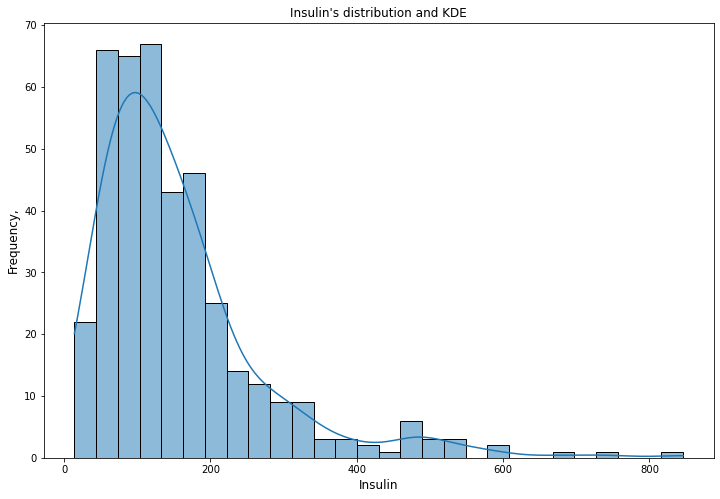

In [8]:
#Draw the histogram of Insulin column along with kernel density estimation (KDE) curb.

# Create histogram and add a KDE curve using seaborn. 
plt.figure(figsize=(12, 8)), sns.histplot(new_df['Insulin'], kde=True)

# Set labels for the axes and a title
plt.xlabel("Insulin", fontsize=12), plt.ylabel("Frequency,", fontsize=12)
plt.title("Insulin's distribution and KDE", fontsize=12)
plt.show()

Question 2

In [5]:
#Group the patients by number of pregnancies, along with their average BloodPressure
#group and rename columns
preg_avgBP = new_df.groupby('Pregnancies')['BloodPressure'].mean().reset_index()
preg_avgBP.columns = ['Pregnancies', 'Average_BloodPressure']
print(preg_avgBP)

    Pregnancies  Average_BloodPressure
0             0              73.403509
1             1              68.148936
2             2              66.107692
3             3              70.177778
4             4              70.458333
5             5              73.300000
6             6              67.052632
7             7              72.476190
8             8              78.571429
9             9              81.333333
10           10              82.400000
11           11              81.600000
12           12              74.400000
13           13              86.666667
14           14              78.000000
15           15              70.000000
16           17              72.000000


In [6]:
##Group the patients by number of pregnancies, along with the average age, sum of all ages in
#that group, and the count of patients in that group

avg_ans = new_df.groupby('Pregnancies').agg(Avrg_Age=('Age', 'mean'),Ages_Sum=('Age', 'sum'),Count=('Age', 'count')
).reset_index()
print(avg_ans)

    Pregnancies   Avrg_Age  Ages_Sum  Count
0             0  24.258621      1407     58
1             1  27.122449      2658     98
2             2  25.194030      1688     67
3             3  28.244444      1271     45
4             4  30.407407       821     27
5             5  34.666667       728     21
6             6  38.368421       729     19
7             7  42.761905       898     21
8             8  44.714286       626     14
9             9  46.583333       559     12
10           10  48.000000       288      6
11           11  48.400000       242      5
12           12  46.800000       234      5
13           13  46.333333       139      3
14           14  46.000000        46      1
15           15  43.000000        43      1
16           17  47.000000        47      1


In [7]:
#Add a new column named ‘BMI/Age’ with the value of BMI over the Age, without using any
#loops

new_df = new_df.assign(**{'BMI/Age': new_df['BMI'] / new_df['Age']})

new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age
3,1,89,66.0,23,94,28.1,0.167,21,0,1.338095
4,0,137,40.0,35,168,43.1,2.288,15,1,2.873333
6,3,78,50.0,32,88,31.0,0.248,26,1,1.192308
8,2,197,70.0,45,543,30.5,0.158,53,1,0.575472
13,1,189,60.0,23,846,30.1,0.398,59,1,0.510169
...,...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,205,33.2,0.591,25,0,1.328000
781,1,140,74.0,26,180,24.1,0.828,23,0,1.047826
782,1,144,82.0,46,180,46.1,0.335,46,1,1.002174
785,2,121,70.0,32,95,39.1,0.886,23,0,1.700000
